In [1]:
## Import dependecies
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Key word Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Error loading punkt: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [3]:
import sys
import os

sys.path.append('../scripts')

##### Load the CSV files scraped from the web

In [4]:
from preprocess import load_csv

In [5]:
df1 = load_csv('../data/raw_data/CBE_reviews.csv')
df2 = load_csv('../data/raw_data/BOA_reviews.csv')
df3 = load_csv('../data/raw_data/DBE_reviews.csv')

In [6]:
# Show the first five rows of CBE review data
df1.head()

,review_text,rating,date,bank_name,source
0,Best Mobile Banking app ever,5,2025-06-04,Commercial Bank of Ethiopia,Google Play
1,good,5,2025-06-04,Commercial Bank of Ethiopia,Google Play
2,it was good app but it have some issues like i...,2,2025-06-04,Commercial Bank of Ethiopia,Google Play
3,dedeb,5,2025-06-04,Commercial Bank of Ethiopia,Google Play
4,good,5,2025-06-04,Commercial Bank of Ethiopia,Google Play


In [7]:
# Show the first five records of BOA data
df2.head()

,review_text,rating,date,bank_name,source
0,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Absynia Ethiopia,Google Play
1,exceptional,5,2025-06-03,Bank of Absynia Ethiopia,Google Play
2,BoA Mobile good bank,5,2025-06-02,Bank of Absynia Ethiopia,Google Play
3,this is worest app 24/7 loading,1,2025-06-01,Bank of Absynia Ethiopia,Google Play
4,This App is not interest for Android phone Ple...,1,2025-06-01,Bank of Absynia Ethiopia,Google Play


In [8]:
## The first five records of Dashen Bank review
df3.head()

,review_text,rating,date,bank_name,source
0,መቸሸጠ,5,2025-06-03,Dashen Bank of Ethiopia,Google Play
1,wow,5,2025-06-03,Dashen Bank of Ethiopia,Google Play
2,gadaa,5,2025-06-01,Dashen Bank of Ethiopia,Google Play
3,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank of Ethiopia,Google Play
4,good,4,2025-05-31,Dashen Bank of Ethiopia,Google Play


### Size of the each banks review dataset

In [9]:
print('The size of the CBE review data uncleaned is: ',df1.shape)
print('The size of the BOA review data uncleaned is: ',df2.shape)
print('The size of the DBE review data uncleaned is: ',df3.shape)

The size of the CBE review data uncleaned is:  (5000, 5)
The size of the BOA review data uncleaned is:  (1044, 5)
The size of the DBE review data uncleaned is:  (449, 5)


#### Clean the dataset for each bank

In [10]:
from preprocess import clean_data, balance_review

In [11]:
df1 = clean_data(df1)
df2 = clean_data(df2)
df3 = clean_data(df3)

Size of each bank's review after cleaning

In [12]:
df1.shape, df2.shape, df3.shape

((4884, 5), (1036, 5), (448, 5))

Balancing the review to target of 400 per bank

In [13]:
df1 = balance_review(df1)
df2 = balance_review(df2)
df3 = balance_review(df3)

In [14]:
df1.shape, df2.shape, df3.shape

((400, 5), (400, 5), (400, 5))

#### Combine dataframes into one

In [15]:
from preprocess import combine_dataframes

In [17]:
df = combine_dataframes([df1, df2, df3])

In [21]:
df[df['bank_name']== "Commercial Bank of Ethiopia"]

,review_text,rating,date,bank_name,source
0,ጥሩ,5,2025-01-02,Commercial Bank of Ethiopia,Google Play
1,ቆንጆ ነው,5,2025-03-31,Commercial Bank of Ethiopia,Google Play
2,good app,4,2024-12-29,Commercial Bank of Ethiopia,Google Play
3,በጣም አሪፍ አፕ ነው!!😘😘,5,2023-09-02,Commercial Bank of Ethiopia,Google Play
4,Good,5,2024-09-19,Commercial Bank of Ethiopia,Google Play
...,...,...,...,...,...
395,"It's not consistent. Now you can use , tomorro...",3,2023-07-03,Commercial Bank of Ethiopia,Google Play
396,በጣም አሪፍ,5,2025-01-10,Commercial Bank of Ethiopia,Google Play
397,"Please help me,this apps do with mobile data",5,2023-11-08,Commercial Bank of Ethiopia,Google Play
398,Best apk ever,5,2024-06-02,Commercial Bank of Ethiopia,Google Play


In [25]:
df[df['bank_name']== "Bank of Absynia Ethiopia"]

,review_text,rating,date,bank_name,source
400,it doesnt work it crashes,1,2024-05-03,Bank of Absynia Ethiopia,Google Play
401,Always do update and that is annoying,3,2025-01-27,Bank of Absynia Ethiopia,Google Play
402,From Ethiopian Internet banking Abbisiniya Int...,1,2024-05-01,Bank of Absynia Ethiopia,Google Play
403,Verry nice,5,2024-06-17,Bank of Absynia Ethiopia,Google Play
404,I don't get why this app is developed it is no...,1,2024-05-12,Bank of Absynia Ethiopia,Google Play
...,...,...,...,...,...
795,Worst App it ain't allowing yo activate not ev...,1,2024-02-13,Bank of Absynia Ethiopia,Google Play
796,"For anyone who wants to download it, just don'...",1,2025-03-19,Bank of Absynia Ethiopia,Google Play
797,Good,5,2024-08-30,Bank of Absynia Ethiopia,Google Play
798,Good 👍,5,2025-01-03,Bank of Absynia Ethiopia,Google Play


In [27]:
df[df['bank_name']== "Dashen Bank of Ethiopia"]

,review_text,rating,date,bank_name,source
800,nic,5,2025-03-22,Dashen Bank of Ethiopia,Google Play
801,The best App of all,5,2025-03-17,Dashen Bank of Ethiopia,Google Play
802,betam mirt Ena betam le atikakem kelel Yale En...,5,2025-04-22,Dashen Bank of Ethiopia,Google Play
803,It doesn't work,1,2025-02-07,Dashen Bank of Ethiopia,Google Play
804,faster than this version,5,2025-05-01,Dashen Bank of Ethiopia,Google Play
...,...,...,...,...,...
1195,Amazing app to use as usual! But why option of...,4,2025-01-20,Dashen Bank of Ethiopia,Google Play
1196,wallahi very fantastic Bank,5,2025-03-31,Dashen Bank of Ethiopia,Google Play
1197,Dashen Super App isn’t just an app — it’s an e...,5,2025-04-21,Dashen Bank of Ethiopia,Google Play
1198,Wow amazing app,5,2025-02-21,Dashen Bank of Ethiopia,Google Play


In [28]:
# Check if it has null or missing value
print("CBE, BOA, DBE")
print("====")
print(df.isnull().sum())

CBE, BOA, DBE
====
review_text    0
rating         0
date           0
bank_name      0
source         0
dtype: int64


From the above we can see that there is no missing value for the review dataset and also the nmber of records for each is more than 400 review. But after balancing

CBE: 400 records
BOA: 400 records
DBE: 400 records

#### Save the cleaned review data combined

In [35]:
from preprocess import save_cleand_data

In [37]:
save_cleand_data(df, '../data/cleaned_data/cleaned_reviews.csv')

Cleaned data saved to ../data/cleaned_data/cleaned_reviews.csv


#### Descriptive Analysis

In [46]:
df_cleaned = load_csv('../data/cleaned_data/cleaned_reviews.csv')

In [47]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  1200 non-null   object
 1   rating       1200 non-null   int64 
 2   date         1200 non-null   object
 3   bank_name    1200 non-null   object
 4   source       1200 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.0+ KB


In [48]:
df_cleaned

,review_text,rating,date,bank_name,source
0,ጥሩ,5,2025-01-02,Commercial Bank of Ethiopia,Google Play
1,ቆንጆ ነው,5,2025-03-31,Commercial Bank of Ethiopia,Google Play
2,good app,4,2024-12-29,Commercial Bank of Ethiopia,Google Play
3,በጣም አሪፍ አፕ ነው!!😘😘,5,2023-09-02,Commercial Bank of Ethiopia,Google Play
4,Good,5,2024-09-19,Commercial Bank of Ethiopia,Google Play
...,...,...,...,...,...
1195,Amazing app to use as usual! But why option of...,4,2025-01-20,Dashen Bank of Ethiopia,Google Play
1196,wallahi very fantastic Bank,5,2025-03-31,Dashen Bank of Ethiopia,Google Play
1197,Dashen Super App isn’t just an app — it’s an e...,5,2025-04-21,Dashen Bank of Ethiopia,Google Play
1198,Wow amazing app,5,2025-02-21,Dashen Bank of Ethiopia,Google Play


In [49]:
df1 = df_cleaned[df_cleaned['bank_name'] == "Commercial Bank of Ethiopia"]
df2 = df_cleaned[df_cleaned['bank_name'] == "Bank of Absynia Ethiopia"]
df3 = df_cleaned[df_cleaned['bank_name'] == "Dashen Bank of Ethiopia"]

In [50]:
df1['rating'].describe()

count    400.000000
mean       4.197500
std        1.401215
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [51]:
df2['rating'].describe()

count    400.000000
mean       3.087500
std        1.874467
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [52]:
df3['rating'].describe()

count    400.000000
mean       4.475000
std        1.201242
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [53]:
df1['review_length'] = df1['review_text'].apply(lambda x: len(x.split()))
df2['review_length'] = df2['review_text'].apply(lambda x: len(x.split()))
df3['review_length'] = df3['review_text'].apply(lambda x: len(x.split()))

C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_8360\352102795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review_length'] = df1['review_text'].apply(lambda x: len(x.split()))
C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_8360\352102795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['review_length'] = df2['review_text'].apply(lambda x: len(x.split()))
C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_8360\352102795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [54]:
df1 = df1.sort_values(by='date', ascending=True)
df2 = df2.sort_values(by='date', ascending=True)
df3 = df3.sort_values(by='date', ascending=True)

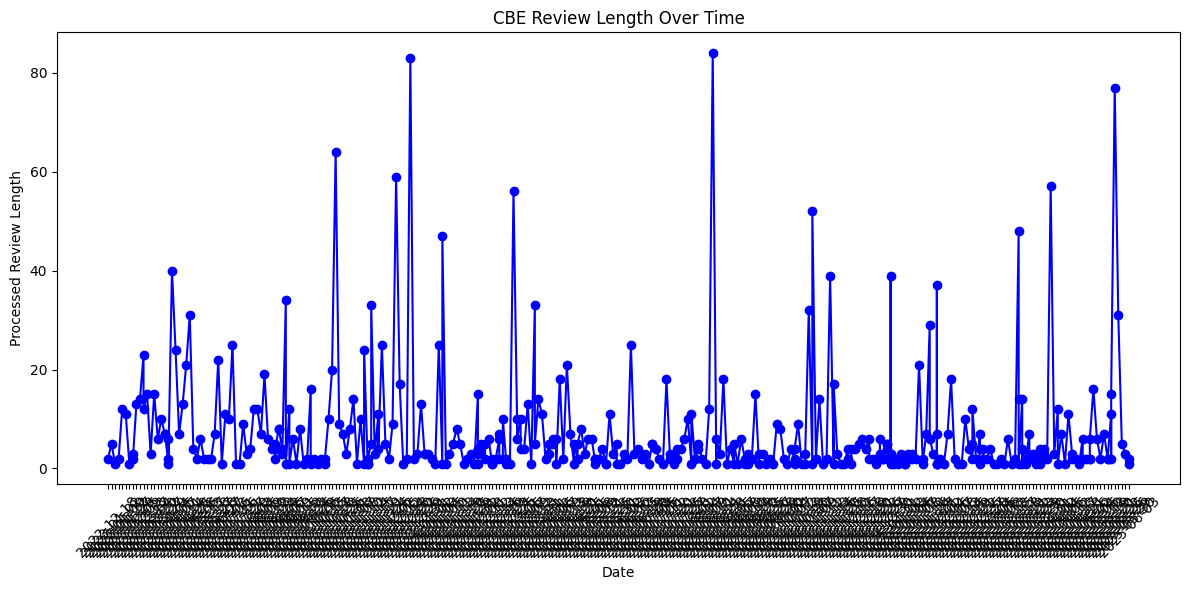

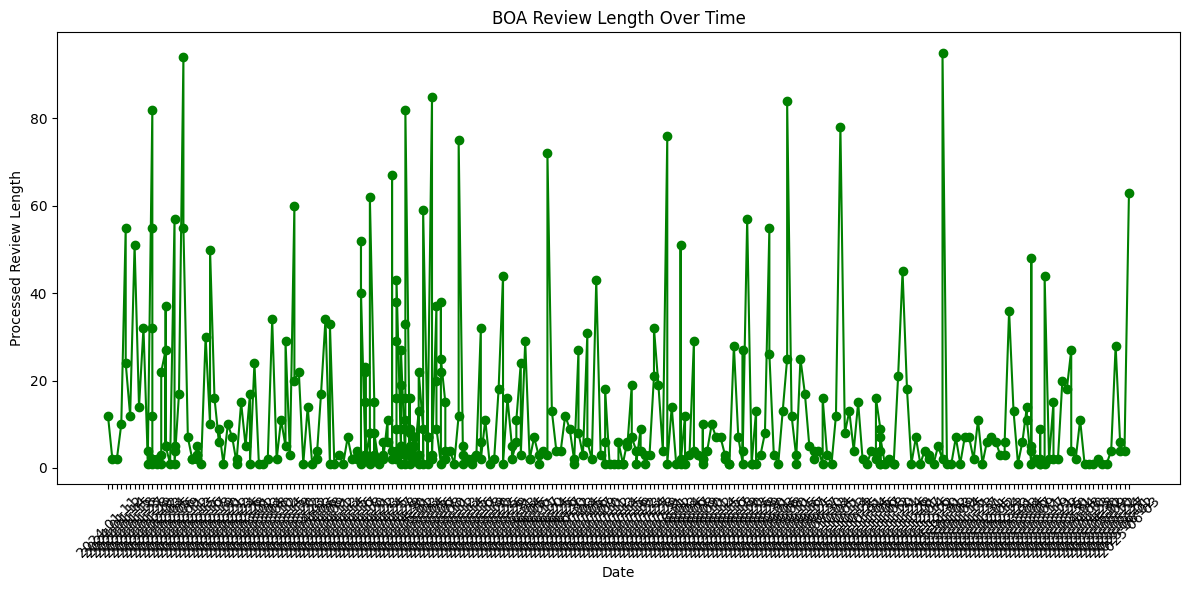

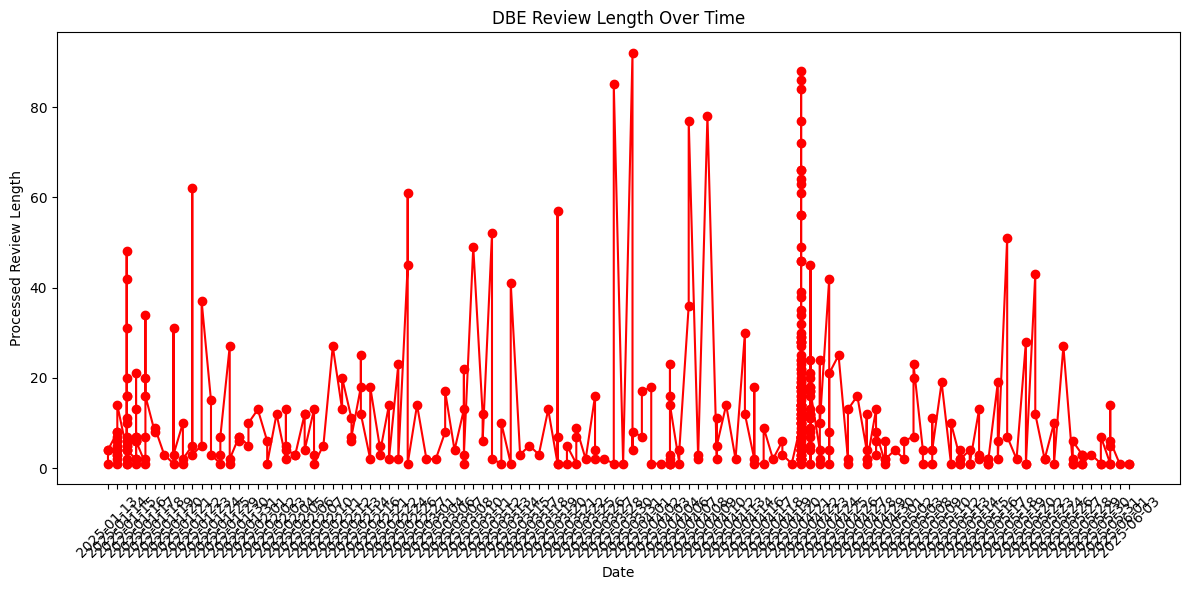

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(df1['date'], df1['review_length'], marker='o', linestyle='-', color='blue')
plt.title('CBE Review Length Over Time')
plt.xlabel('Date')
plt.ylabel('Processed Review Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.plot(df2['date'], df2['review_length'], marker='o', linestyle='-', color='green')
plt.title('BOA Review Length Over Time')
plt.xlabel('Date')
plt.ylabel('Processed Review Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.plot(df3['date'], df3['review_length'], marker='o', linestyle='-', color='red')
plt.title('DBE Review Length Over Time')
plt.xlabel('Date')
plt.ylabel('Processed Review Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Boxplot of Ratings by Review Length

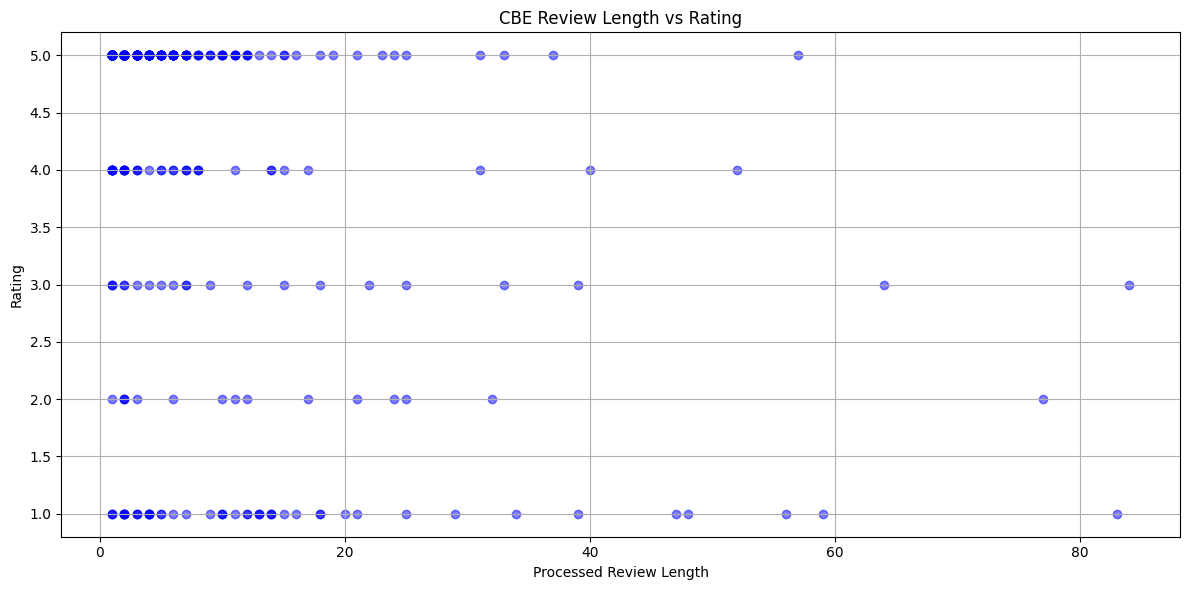

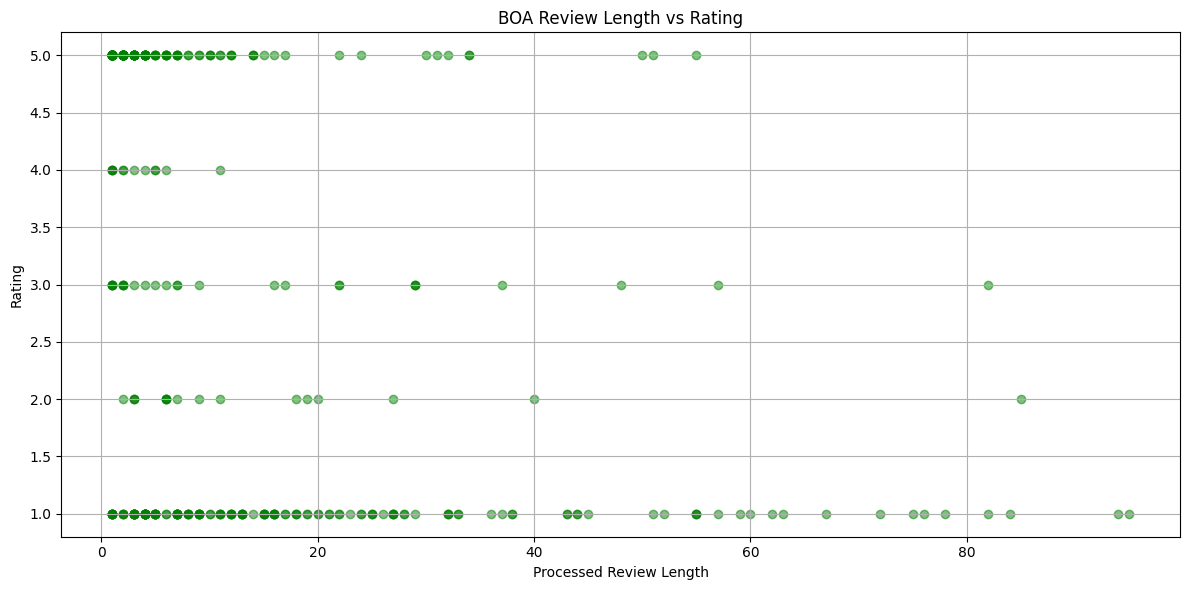

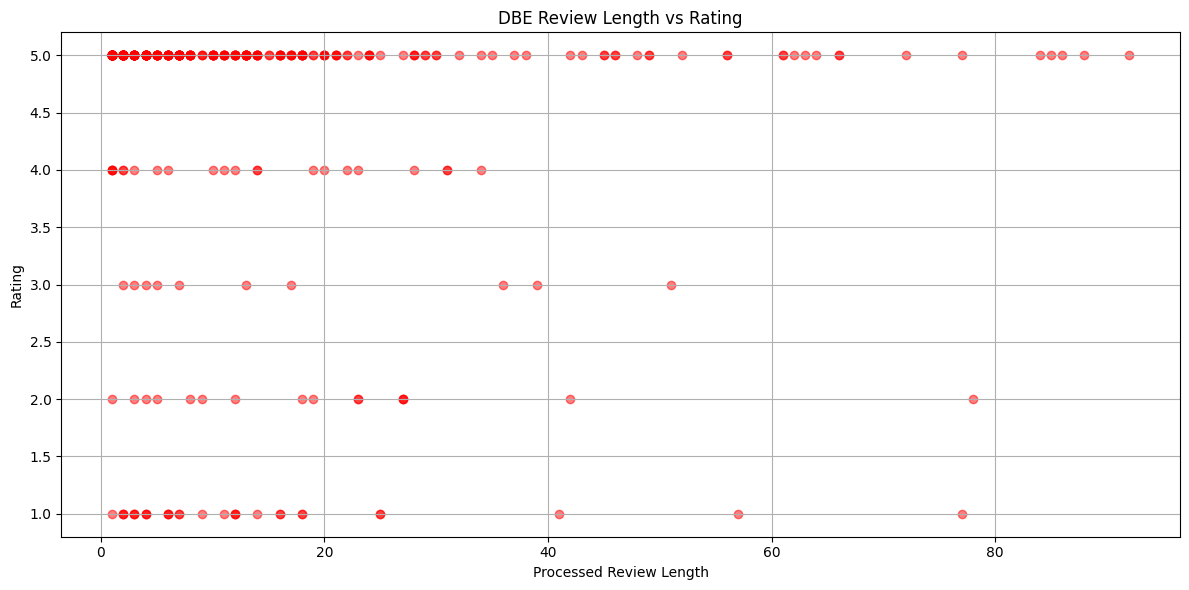

In [56]:
plt.figure(figsize=(12, 6))
plt.scatter(df1['review_length'], df1['rating'], alpha=0.5, color='blue')
plt.title('CBE Review Length vs Rating')
plt.xlabel('Processed Review Length')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.scatter(df2['review_length'], df2['rating'], alpha=0.5, color='green')
plt.title('BOA Review Length vs Rating')
plt.xlabel('Processed Review Length')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.scatter(df3['review_length'], df3['rating'], alpha=0.5, color='red')
plt.title('DBE Review Length vs Rating')
plt.xlabel('Processed Review Length')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Word Cloud for Reviews of each bank

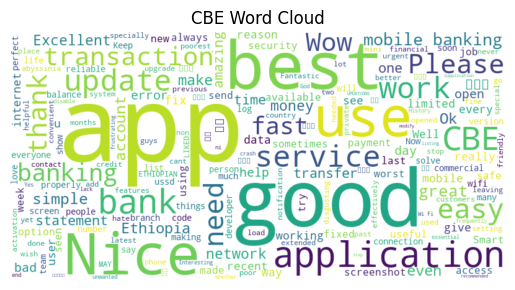

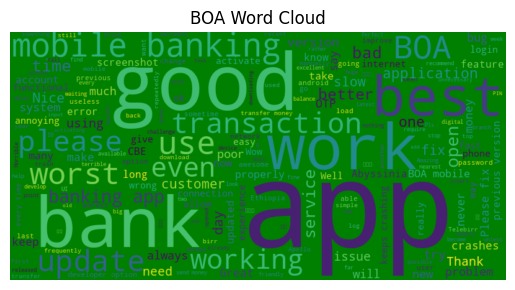

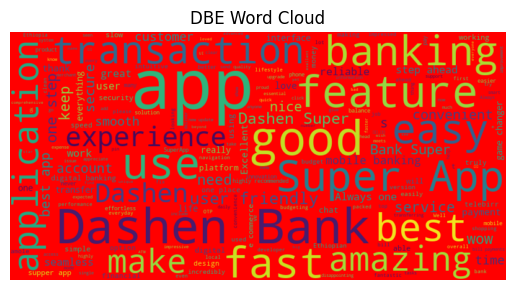

In [57]:
review_text1 = ' '.join(df1['review_text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('CBE Word Cloud')
plt.show()
review_text2 = ' '.join(df2['review_text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(review_text2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('BOA Word Cloud')
plt.show()
review_text3 = ' '.join(df3['review_text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(review_text3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('DBE Word Cloud') 
plt.show()